### Exercise: Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data.

Primero importamos todos las librerias que se usaran

In [4]:
import pandas as pd 
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

Creamos la función del DataFrame para trabajar los datos

In [7]:
def import_csv(file):
    return pd.read_csv(file)

path = "../../Datos/Terminos_lagoon_TA_DIC_2023_RawData.csv"

CO2Data = import_csv(path)

CO2Data.head()

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0


Creamos la función del test de Kruskal Wallis

In [5]:
def kruskal_wallis_test(*groups, alpha = 0.05):
    # se pone el *groups porque aqui se puden añadir mas variables
    # sin necesidad de crear otras funciones 
    # ejemplo:
    # para tres, cuatro o n variables se usa la misma función 
    result = kruskal(*groups)

    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("La diferencia entre grupos es estadisticamente significativa")
    else:
        print("La diferencia entre grupos NO es estadisticamente significativa")

En dado caso que los grupos de datos tengan significancia estadistica metemos la funcion del post hocs dunn

In [6]:
def dunn_poshoc(data, group_col, value_col, p_adjust='bonferroni'):
    results = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(results)
    return results

Para empezar el análisis metemos el boxplot de los datos que queremos analizar en este caso los de DIC y temperatura

## **Temperatura por área**

- ### **Boxplot**

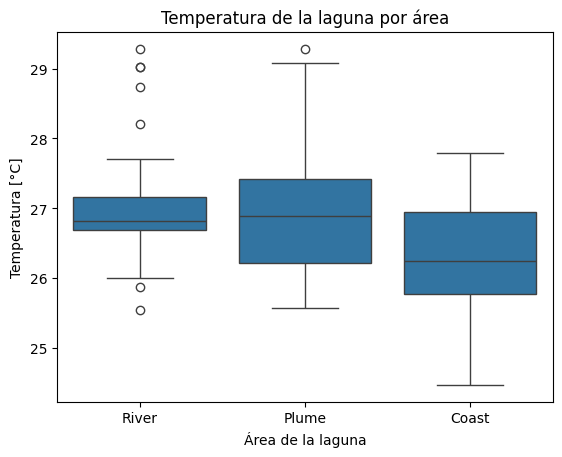

In [11]:
sns.boxplot(x='area', y='temp_c', data=CO2Data)
plt.xlabel("Área de la laguna")
plt.ylabel("Temperatura [°C]")
plt.title("Temperatura de la laguna por área")
plt.show()

- ### **Kruskal Wallis Test**

Se seleccionan las variables para hacer el Kruskal Wallis


In [14]:
# Seleccionamos los datos de cada área de la laguna

temp_river = CO2Data[CO2Data['area'] == 'River']['temp_c']
temp_plume = CO2Data[CO2Data['area'] == 'Plume']['temp_c']
temp_coast = CO2Data[CO2Data['area'] == 'Coast']['temp_c']

Ejecutamos la función del Kruskal Wallis Test

In [15]:
kruskal_wallis_test(temp_river, temp_plume, temp_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
La diferencia entre grupos es estadisticamente significativa


- ### **Post hocs**

Como los grupos tienen diferencia estadisticamente significativa metemos el post hoc para saber entre que grupos

In [18]:
dunn_poshoc(CO2Data, 'area', 'temp_c')

          Coast    Plume     River
Coast  1.000000  0.06468  0.038761
Plume  0.064680  1.00000  1.000000
River  0.038761  1.00000  1.000000


,Coast,Plume,River
Coast,1.000000,0.06468,0.038761
Plume,0.064680,1.00000,1.000000
River,0.038761,1.00000,1.000000


## **DIC por área**

- ### **Boxplot**

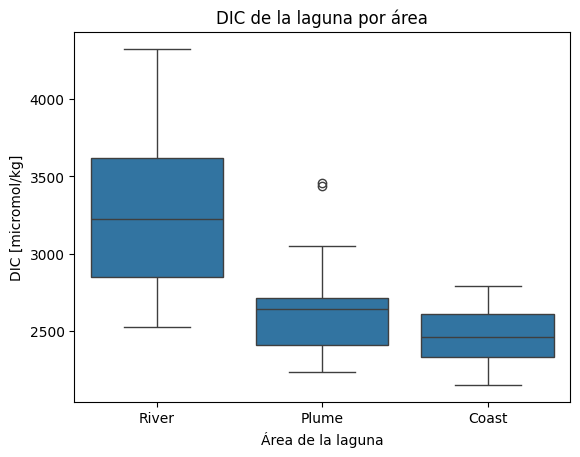

In [12]:
sns.boxplot(x='area', y='dic_micromol_kg', data=CO2Data)
plt.xlabel("Área de la laguna")
plt.ylabel("DIC [micromol/kg]")
plt.title("DIC de la laguna por área")
plt.show()

- ### **Kruskal Wallis Test**

Se seleccionan las variables para hacer el Kruskal Wallis


In [16]:
# Seleccionamos los datos de cada área de la laguna

dic_river = CO2Data[CO2Data['area'] == 'River']['dic_micromol_kg']
dic_plume = CO2Data[CO2Data['area'] == 'Plume']['dic_micromol_kg']
dic_coast = CO2Data[CO2Data['area'] == 'Coast']['dic_micromol_kg']

Ejecutamos la función del test de Kruskal Wallis

In [17]:
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
La diferencia entre grupos es estadisticamente significativa


- ### **Post hocs**

Como los grupos tienen diferencia estadisticamente significativa metemos el post hoc para saber entre que grupos

In [19]:
dunn_poshoc(CO2Data, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00
